#Load Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
import pandas as pd
file_path = '/content/final_merged_df.csv'
predictive_df = pd.read_csv(file_path)

# Preview the data
predictive_df.head()

,Facility Name,Rural Versus Urban,CCN Facility Type,FTE - Employees on Payroll,Number of Interns and Residents (FTE),Number of Beds,Total Bed Days Available,Total Costs,Combined Outpatient + Inpatient Total Charges,Total Salaries (adjusted),...,Quietness - star rating,Recommend hospital - star rating,Staff responsiveness - star rating,Summary star rating,Facility ID,Address,City/Town,State,ZIP Code,County/Parish
0,PENDER MEMORIAL HOSPITAL,U,CAH,29.88,NaN,25.0,2300.0,7768055.0,2.505002e+07,NaN,...,NaN,NaN,NaN,NaN,341307.0,507 E FREMONT ST,BURGAW,NC,28425,PENDER
1,JACKSONVILLE MEMORIAL HOSPITAL,R,STH,576.48,NaN,106.0,21942.0,58046992.0,2.449719e+08,22295358.0,...,NaN,NaN,NaN,NaN,141352.0,1600 W WALNUT ST,JACKSONVILLE,IL,62650,MORGAN
2,UVA HEALTH HAYMARKET MEDICAL CENTER,U,STH,234.10,NaN,44.0,7964.0,38698051.0,1.855402e+08,13817087.0,...,4.0,4.0,3.0,4.0,490144.0,15225 HEALTHCOTE BOULEVARD,HAYMARKET,VA,20169,PRINCE WILLIAM
3,PIEDMONT CARTERSVILLE MEDICAL CENTER,U,STH,659.02,2.37,119.0,32487.0,108852096.0,1.170805e+09,35726656.0,...,3.0,2.0,2.0,2.0,110030.0,960 JOE FRANK HARRIS PARKWAY,CARTERSVILLE,GA,30120,BARTOW
4,HUNTINGTON HOSPITAL,R,STH,2937.21,41.20,468.0,84287.0,343929970.0,1.995371e+09,161727432.0,...,2.0,4.0,3.0,3.0,50438.0,100 W CALIFORNIA BLVD,PASADENA,CA,91109,LOS ANGELES


#EDA

In [ ]:
predictive_df.shape

(2229, 53)

In [ ]:
predictive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 53 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Facility Name                                                     2229 non-null   object 
 1   Rural Versus Urban                                                2214 non-null   object 
 2   CCN Facility Type                                                 2229 non-null   object 
 3   FTE - Employees on Payroll                                        2207 non-null   float64
 4   Number of Interns and Residents (FTE)                             598 non-null    float64
 5   Number of Beds                                                    2212 non-null   float64
 6   Total Bed Days Available                                          2212 non-null   float64
 7   Total Costs                      

In [ ]:
# Drop specified columns
columns_to_drop = ['Facility Name', 'Rural Versus Urban', 'CCN Facility Type', 'Address', 'City/Town', 'State', 'ZIP Code', 'County/Parish', 'Facility ID' ] # Replace with actual column names
predictive_df1 = predictive_df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
predictive_df1.isnull().sum()

,0
FTE - Employees on Payroll,22
Number of Interns and Residents (FTE),1631
Number of Beds,17
Total Bed Days Available,17
Total Costs,15
Combined Outpatient + Inpatient Total Charges,15
Total Salaries (adjusted),751
Total Current Assets,47
Total Fixed Assets,58
Total Assets,43


##Bivariate

###Histograms

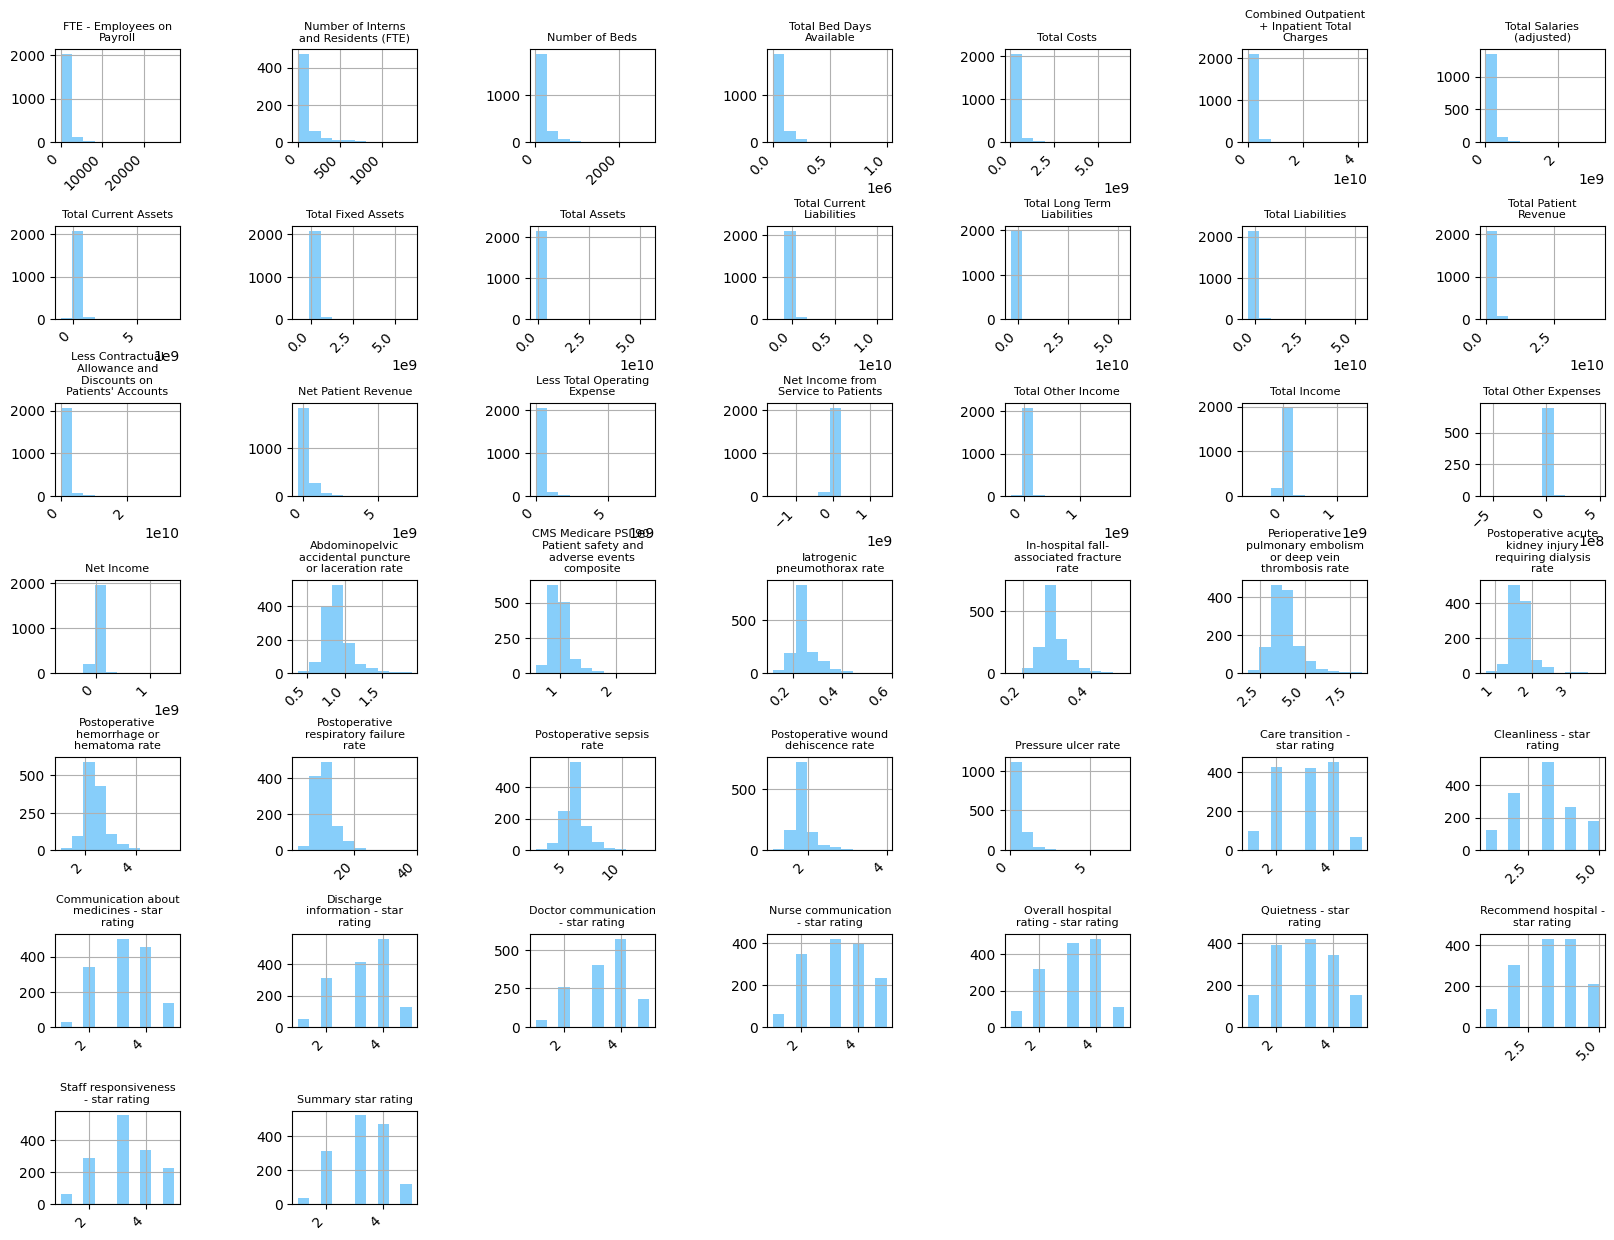

In [ ]:
plt.rcParams['axes.titlesize'] = 8

axes = predictive_df1.hist(figsize=(20,15), color='lightskyblue')

for ax in axes.flatten():
  title = ax.get_title()

  wrapped_title = textwrap.fill(title, width=20)

  ax.set_title(wrapped_title)

  plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.subplots_adjust(hspace=0.9, wspace=0.9)
plt.show()

###Boxplots

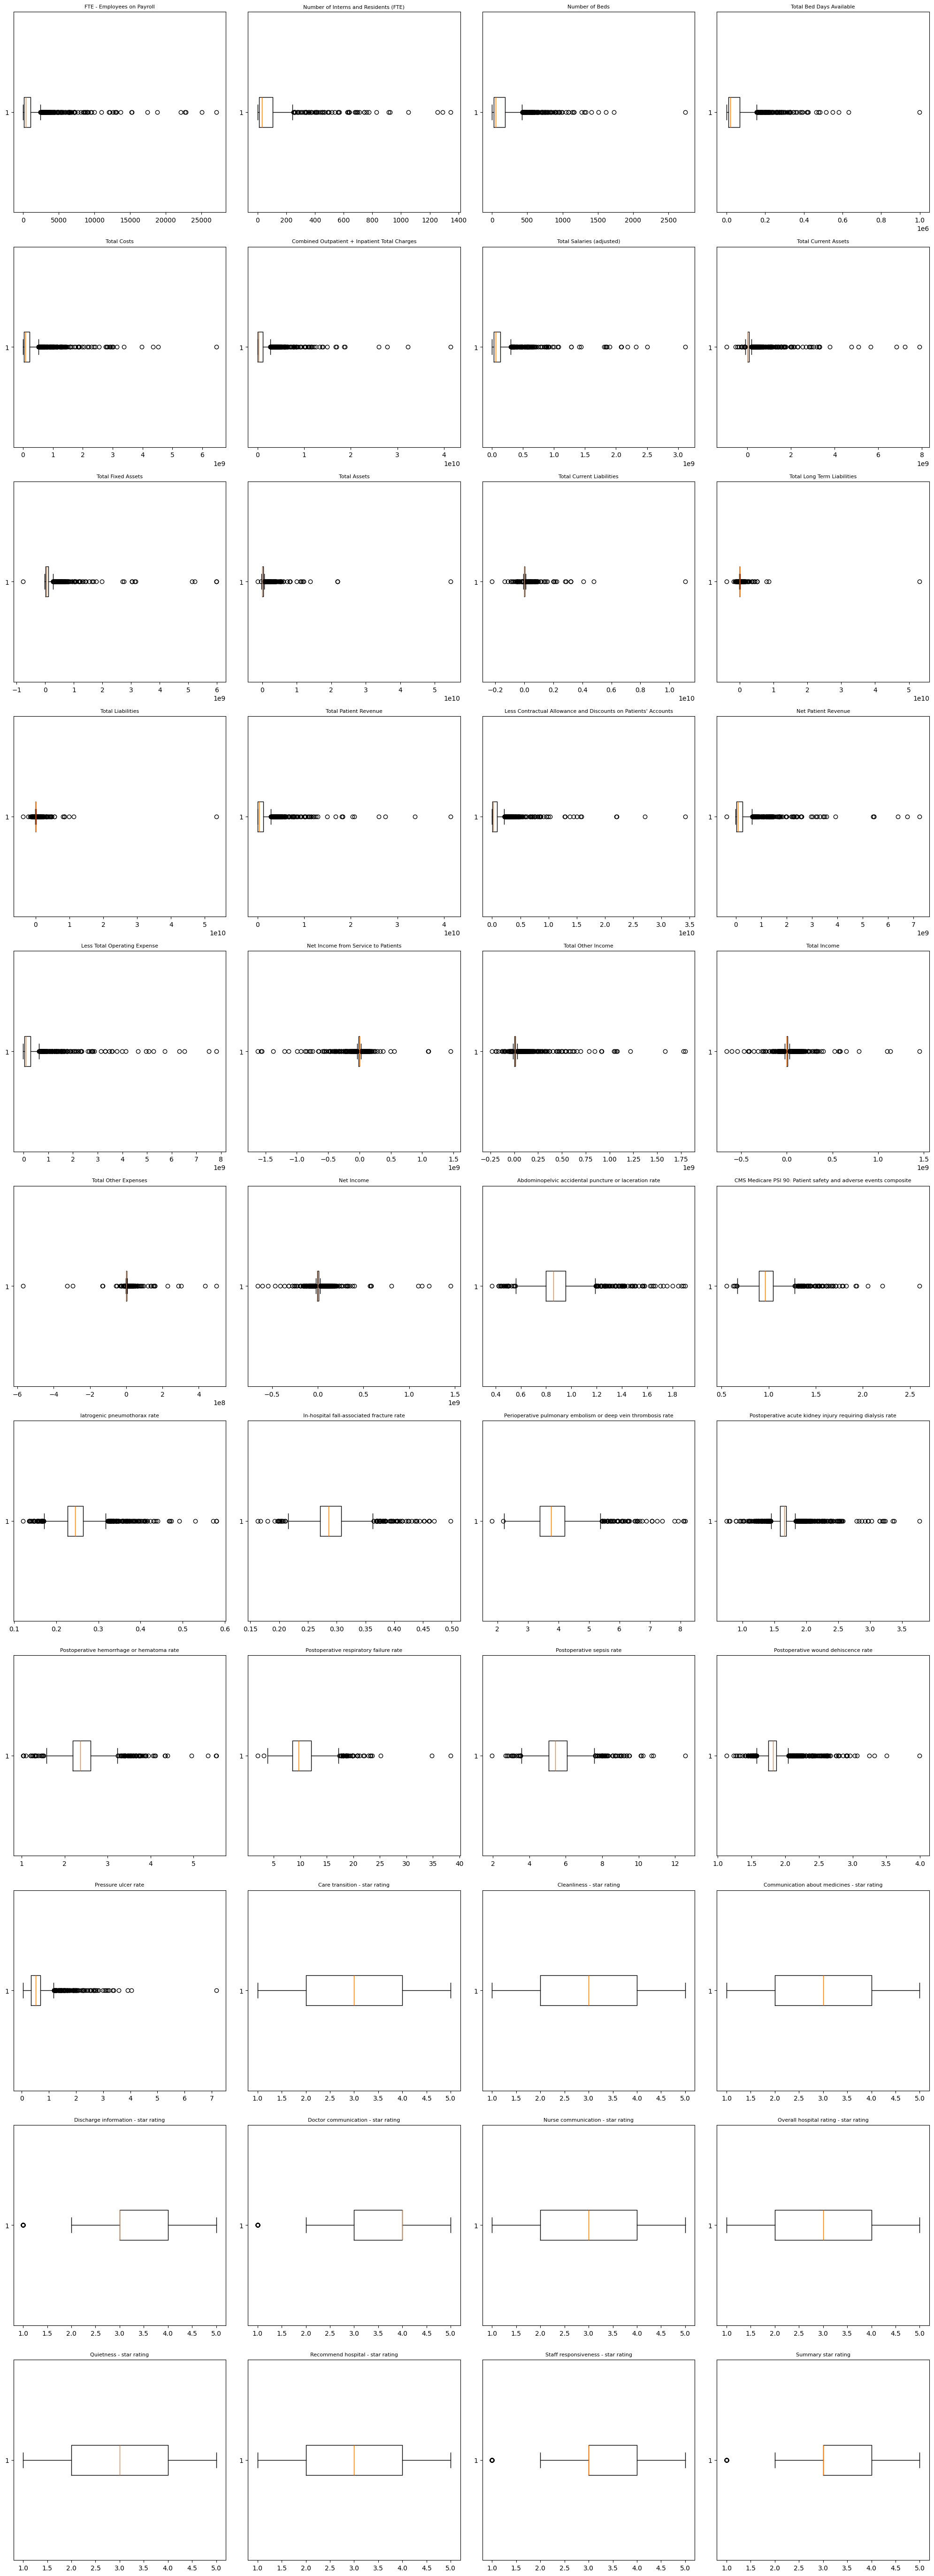

In [ ]:
# Assuming predictive_df is already loaded as in your previous code

numeric_cols = predictive_df1.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns needed for the subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 3) // 4  # Calculate rows, ensuring at least 4 columns

plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size based on rows

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 4, i + 1)  # Dynamically adjust subplot grid
    plt.boxplot(predictive_df1[col].dropna(), vert=False)  # Drop NA values for boxplot
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
predictive_df1[numeric_cols] = scaler.fit_transform(predictive_df1[numeric_cols])


# Preview the data after scaling
predictive_df1.head()

,FTE - Employees on Payroll,Number of Interns and Residents (FTE),Number of Beds,Total Bed Days Available,Total Costs,Combined Outpatient + Inpatient Total Charges,Total Salaries (adjusted),Total Current Assets,Total Fixed Assets,Total Assets,...,Cleanliness - star rating,Communication about medicines - star rating,Discharge information - star rating,Doctor communication - star rating,Nurse communication - star rating,Overall hospital rating - star rating,Quietness - star rating,Recommend hospital - star rating,Staff responsiveness - star rating,Summary star rating
0,0.001101,NaN,0.008769,0.002195,0.000682,0.000604,NaN,0.111056,0.115965,0.024671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.021273,NaN,0.038363,0.021851,0.008465,0.005910,0.006645,0.109233,0.123308,0.027702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.008638,NaN,0.015711,0.007863,0.005469,0.004476,0.003922,0.110249,0.123842,0.025597,...,1.00,0.50,0.75,0.75,0.75,0.75,0.75,0.75,0.50,0.75
3,0.024319,0.001753,0.043113,0.032404,0.016329,0.028249,0.010959,0.120630,0.123063,0.027081,...,0.25,0.25,0.00,0.25,0.25,0.25,0.50,0.25,0.25,0.25
4,0.108394,0.030601,0.170625,0.084242,0.052717,0.048144,0.051431,0.137557,0.218740,0.044291,...,0.50,0.50,0.25,0.50,0.50,0.75,0.25,0.75,0.50,0.50


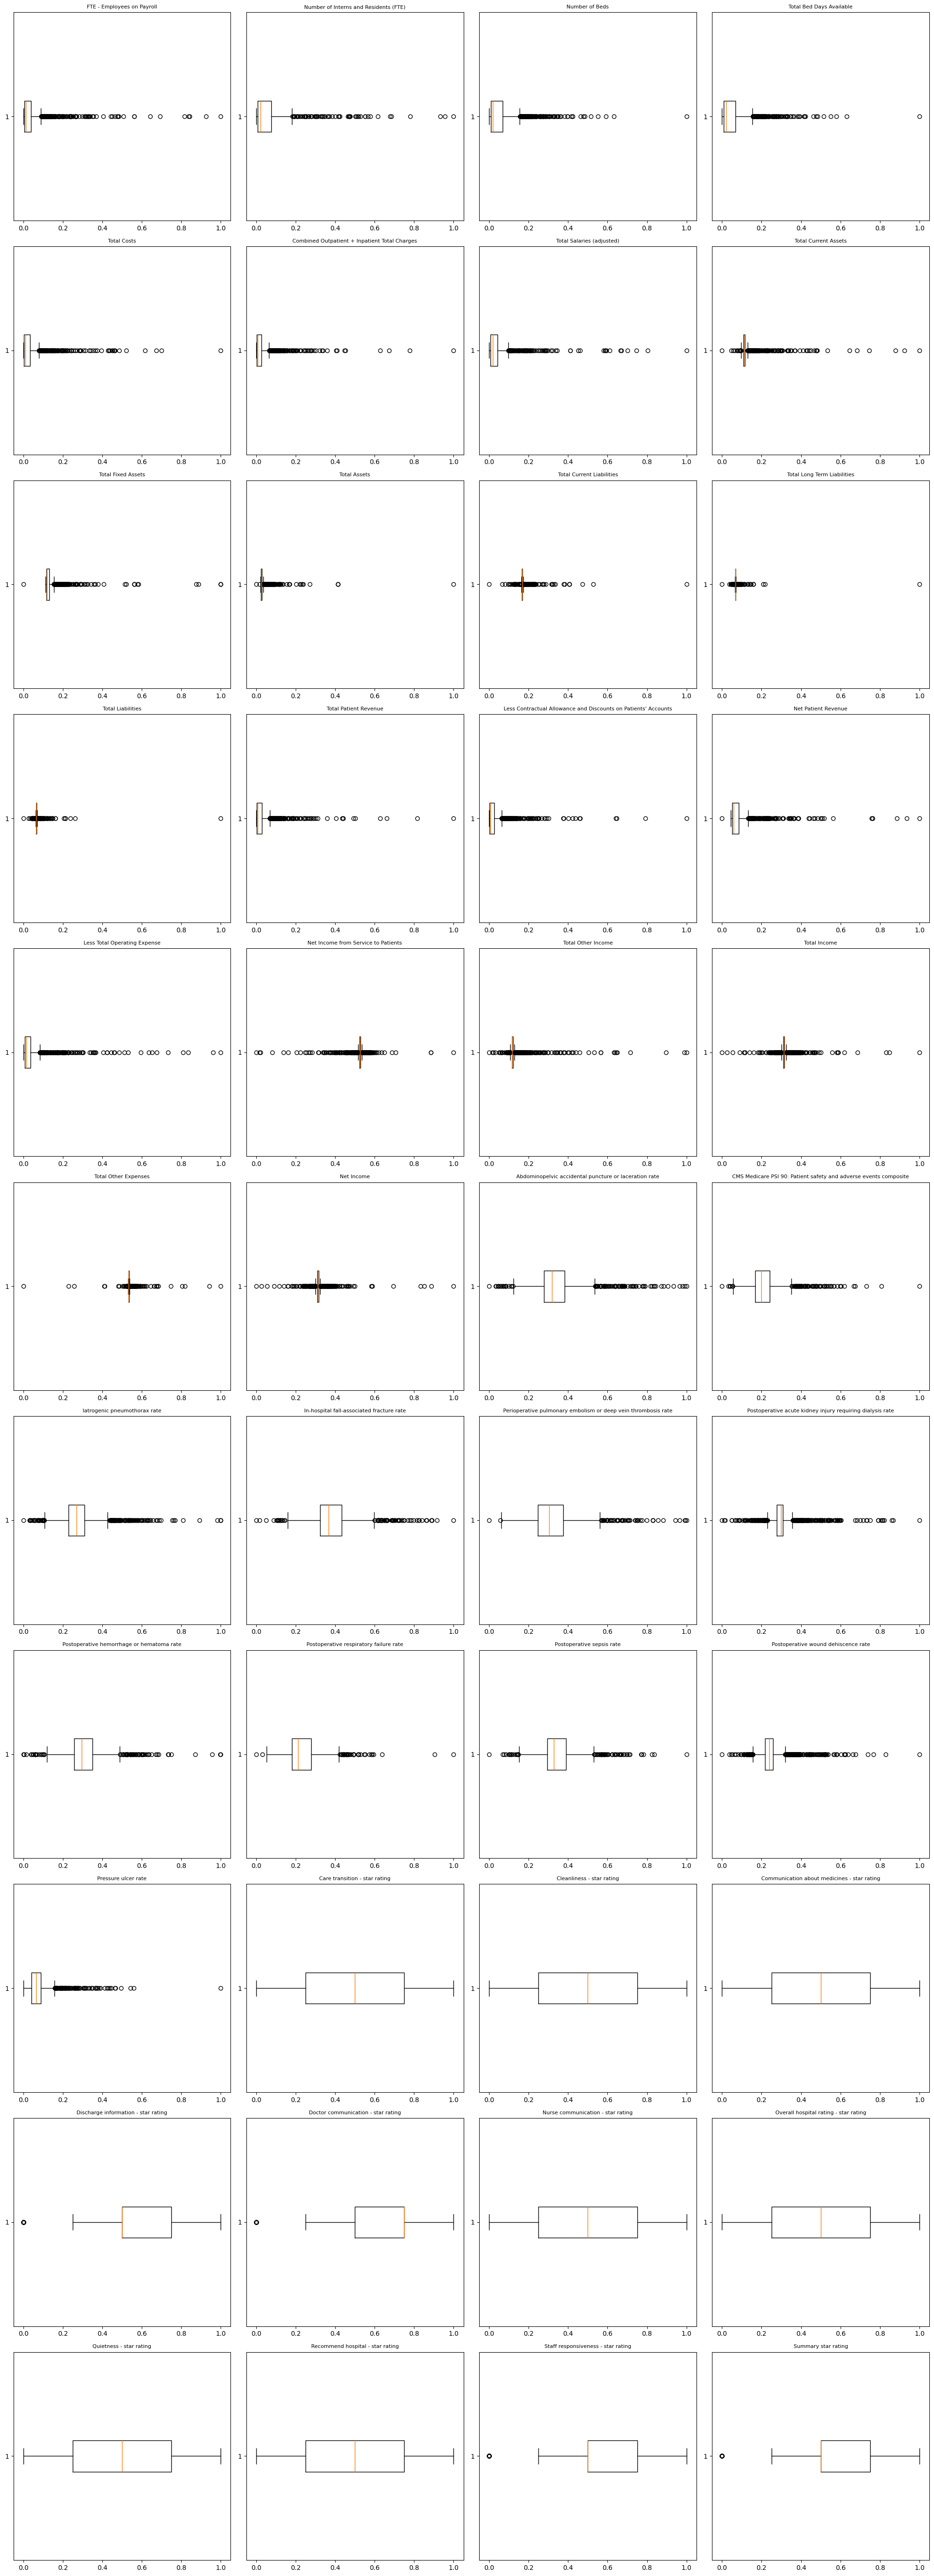

In [ ]:
# Calculate the number of rows and columns needed for the subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 3) // 4  # Calculate rows, ensuring at least 4 columns

plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size based on rows

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 4, i + 1)  # Dynamically adjust subplot grid
    plt.boxplot(predictive_df1[col].dropna(), vert=False)  # Drop NA values for boxplot
    plt.title(col)
    plt.tight_layout()

plt.show()

##Bivariate

###Correlation Matrix


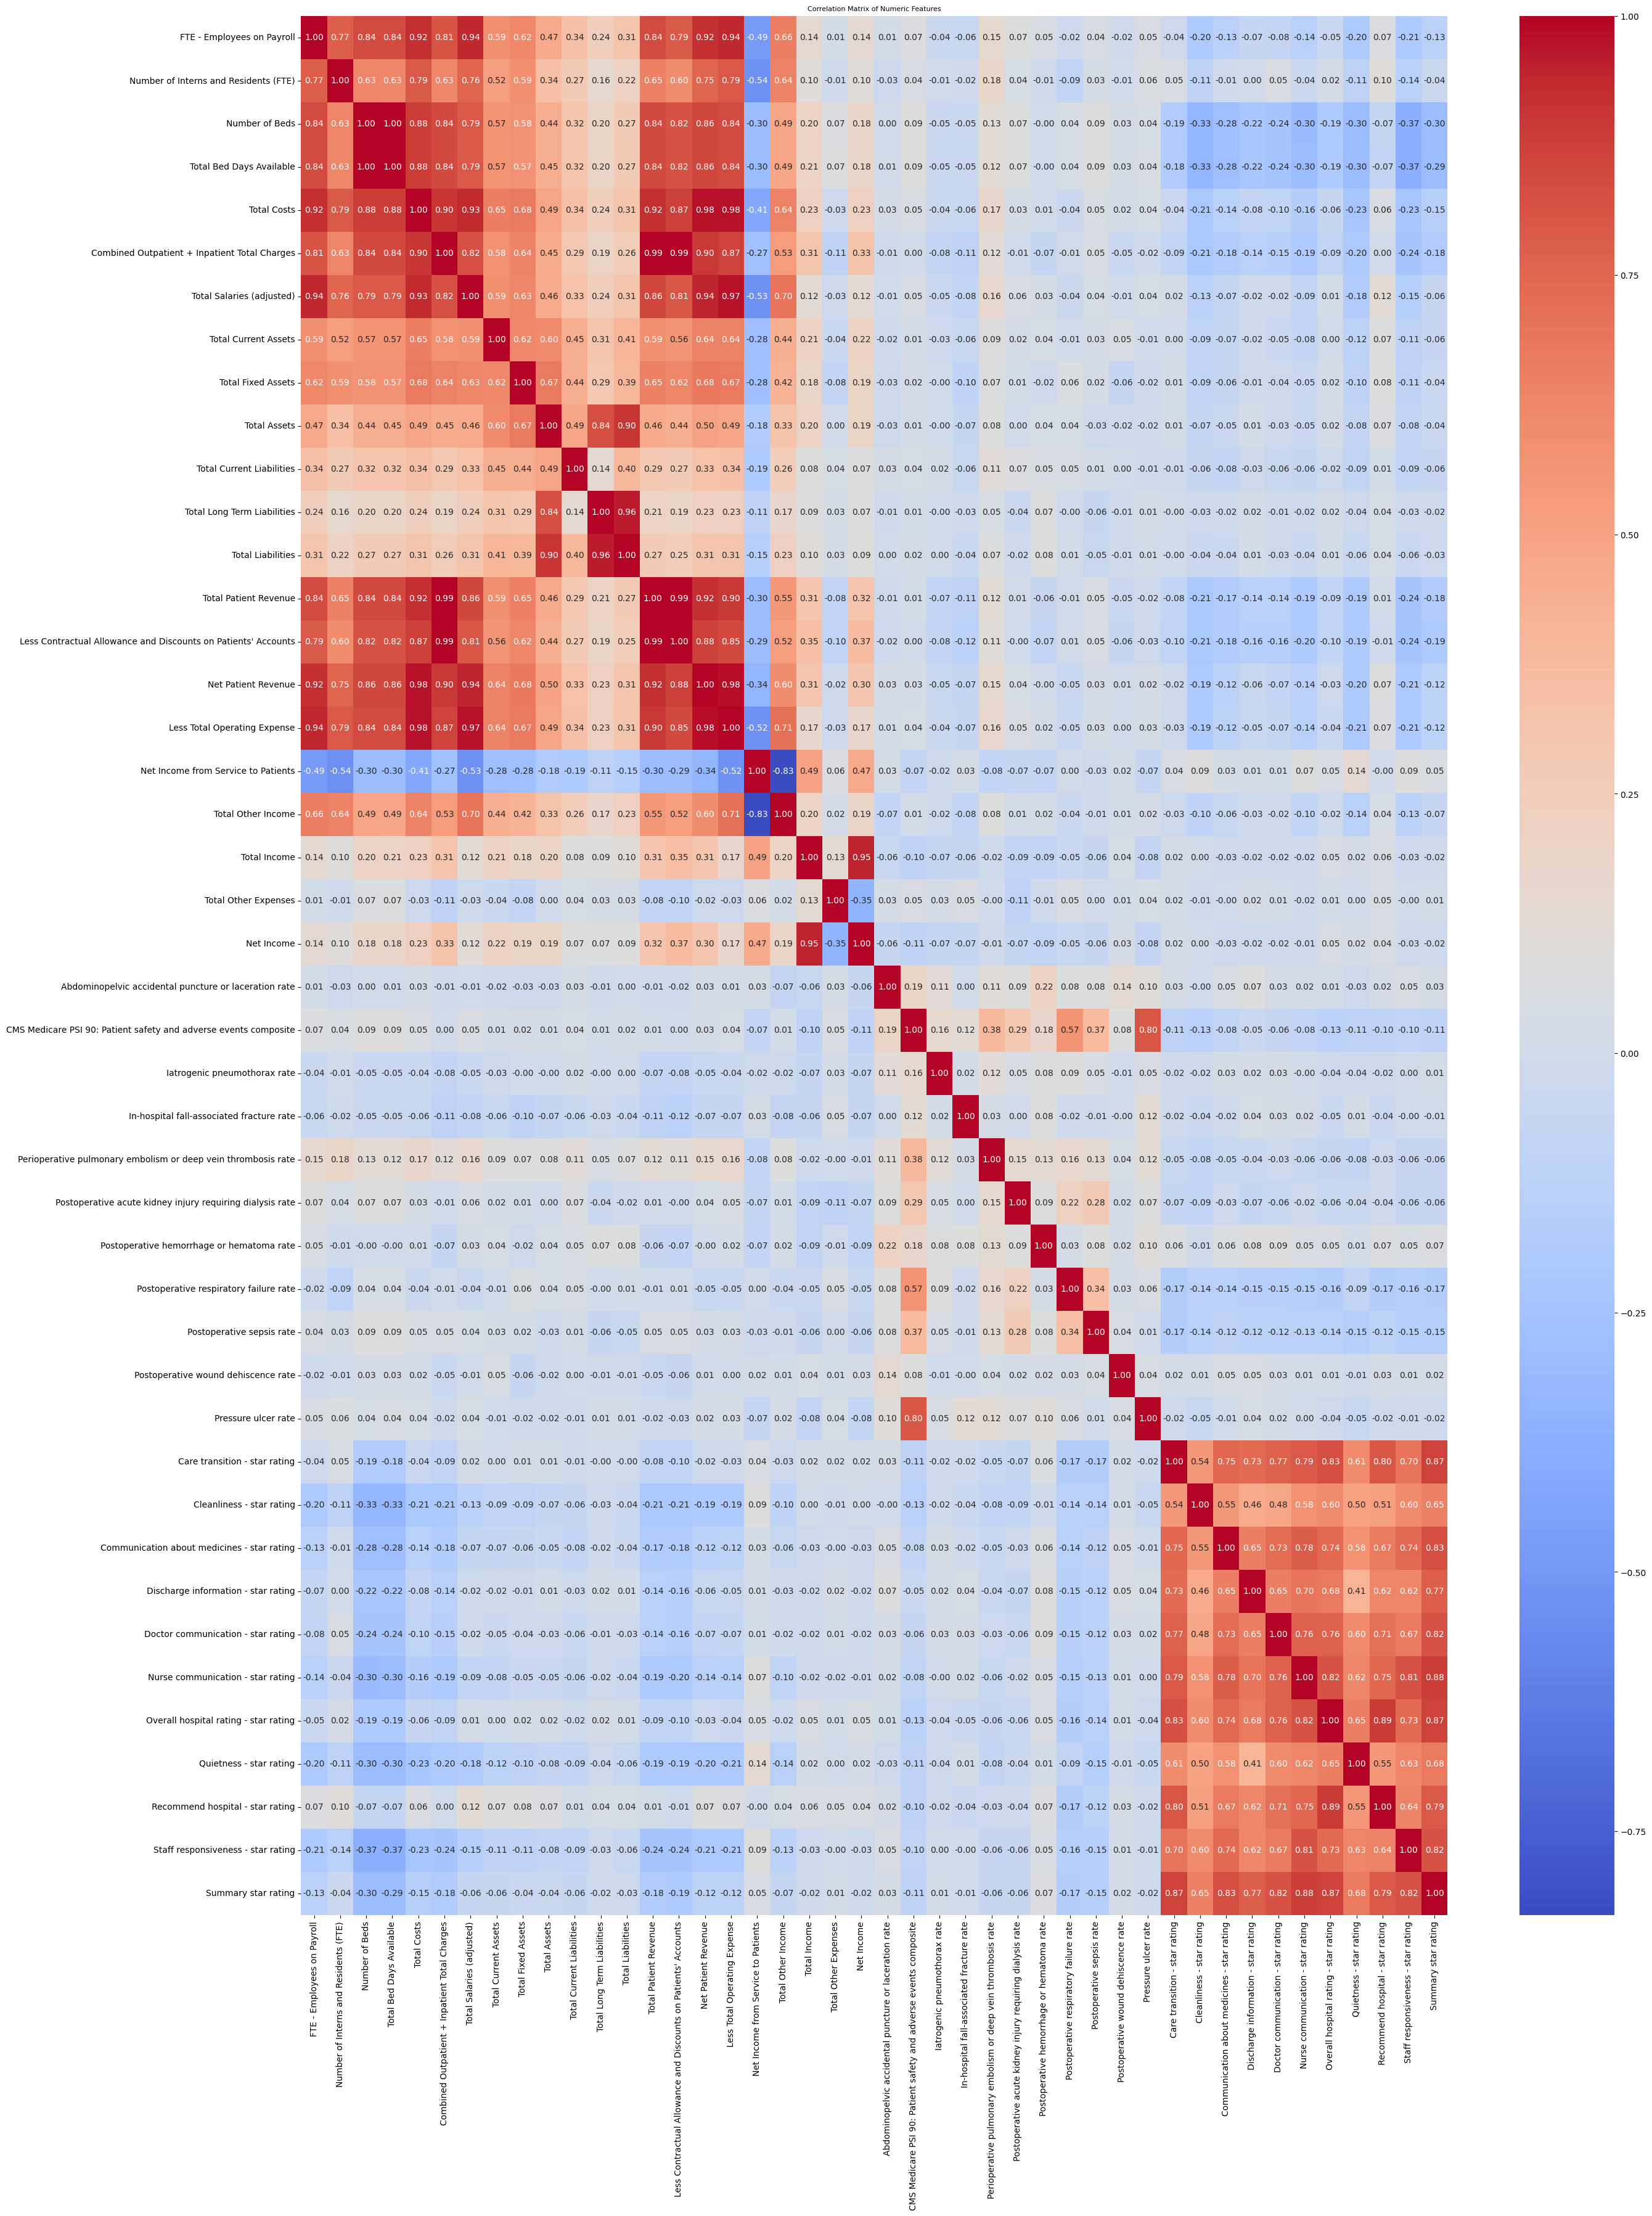


Top 10 Highest Correlations:


Number of Beds                                                  Total Bed Days Available                                          0.997843
Total Patient Revenue                                           Combined Outpatient + Inpatient Total Charges                     0.994895
Less Contractual Allowance and Discounts on Patients' Accounts  Combined Outpatient + Inpatient Total Charges                     0.994550
Total Patient Revenue                                           Less Contractual Allowance and Discounts on Patients' Accounts    0.994305
Net Patient Revenue                                             Less Total Operating Expense                                      0.979153
                                                                Total Costs                                                       0.978442
Less Total Operating Expense                                    Total Costs                                                       0.976055
                                                                Total Salaries (adjusted)                                         0.971978
Total Liabilities                                               Total Long Term Liabilities                                       0.963630
Total Income                                                    Net Income                                                        0.947846
dtype: float64

In [ ]:
# Calculate the correlation matrix
correlation_matrix = predictive_df1.corr()

# Plotting correlation matrix using Seaborn
plt.figure(figsize=(30, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Find the top 10 highest correlations (excluding self-correlations)
correlation_series = correlation_matrix.unstack().sort_values(ascending=False)
top_10_correlations = correlation_series[correlation_series != 1].drop_duplicates().head(10)
print("\nTop 10 Highest Correlations:")
top_10_correlations

#Drop Rows In the Target Variable Column with null values


In [ ]:
# Drop rows with null values in 'summary star rating' column
predictive_null_df = predictive_df1.dropna(subset=['Summary star rating'])

# Check the number of rows and columns in the new DataFrame
rows_null_df, columns_null_df = predictive_null_df.shape

print(f"Number of rows after dropping nulls in 'summary star rating': {rows_null_df}")
print(f"Number of columns: {columns_null_df}")

Number of rows after dropping nulls in 'summary star rating': 1463
Number of columns: 44


In [ ]:
# Get the number of rows and columns of the original DataFrame
rows, columns = predictive_null_df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1463
Number of columns: 44


In [ ]:
# Get the number of rows and columns of the original DataFrame
rows, columns = predictive_null_df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1463
Number of columns: 44


#Linear Regression - Net Income & Summary star rating

In [ ]:
# Create a copy of the DataFrame
predictive_df2 = predictive_null_df.copy()

# Impute numeric columns with their mode in the copied DataFrame
for col in predictive_df2.select_dtypes(include=['number']):
    predictive_df2[col] = predictive_df2[col].fillna(predictive_df2[col].mode()[0])

In [ ]:
X =  predictive_df2[['Net Income']]  # Predictor
y =  predictive_df2['Summary star rating']    # Target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get model coefficients and intercept
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficients: [-0.08197177]
Intercept: 0.5831823952413229


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = linear_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.05712273207877488
R² Score: -0.00029157087827513806


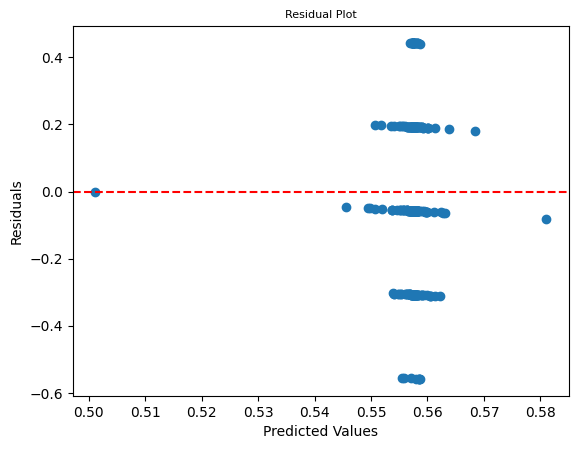

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

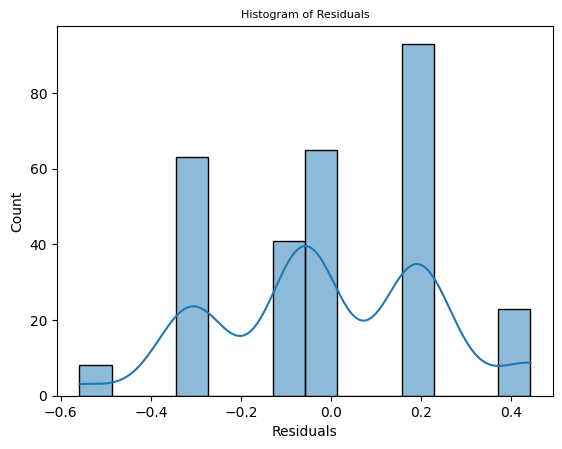

In [ ]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

In [ ]:
import numpy as np

correlation = np.corrcoef(predictive_df2['Net Income'], predictive_df2['Summary star rating'])[0, 1]
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: -0.016415377862254135


In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", stat)
print("P-Value:", p)

if p > 0.05:
    print("Residuals appear to follow a normal distribution.")
else:
    print("Residuals do not follow a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9050114584465498
P-Value: 1.2562261054400294e-12
Residuals do not follow a normal distribution.


In [ ]:
from scipy.stats import zscore

# Compute z-scores of residuals
z_scores = zscore(residuals)

# Identify outliers (e.g., |z| > 3)
outliers = residuals[np.abs(z_scores) > 3]
print("Outliers:", outliers)

Outliers: Series([], Name: Summary star rating, dtype: float64)


#Linear Regression - Multiple Predictors & Summary star rating

In [ ]:
X = predictive_df2.drop(columns=['Care transition - star rating', 'Cleanliness - star rating',
       'Communication about medicines - star rating',
       'Discharge information - star rating',
       'Doctor communication - star rating',
       'Nurse communication - star rating',
       'Overall hospital rating - star rating', 'Quietness - star rating',
       'Recommend hospital - star rating',
       'Staff responsiveness - star rating', 'Summary star rating'])  # Exclude target
y = predictive_df2['Summary star rating']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get model coefficients and intercept
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficients: [ 1.82848498e+00 -4.05997414e-01 -3.58945864e-01 -1.97258008e+00
 -6.13678972e-01  6.63595822e+00 -1.04935291e+00 -4.18876622e-02
  1.40779381e-01  6.42894037e-01 -1.53709462e-01 -1.96382281e-01
 -4.19731642e-01  2.38642071e+01 -2.57034570e+01  1.28359741e-01
 -3.36292796e+00  6.71414367e-01  1.29477742e+00 -6.10252341e+06
  3.07578596e+06  6.10252171e+06  7.90219752e-02  2.29721571e-04
  2.96092951e-03 -1.15411069e-01 -1.40476251e-01 -8.10384810e-02
 -7.55186435e-02 -1.01093758e-01 -2.16851317e-01  4.21095254e-01
  2.60661844e-02]
Intercept: -1642421.8351908177


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = linear_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.04607654780458758
R² Score: 0.19314114176929342


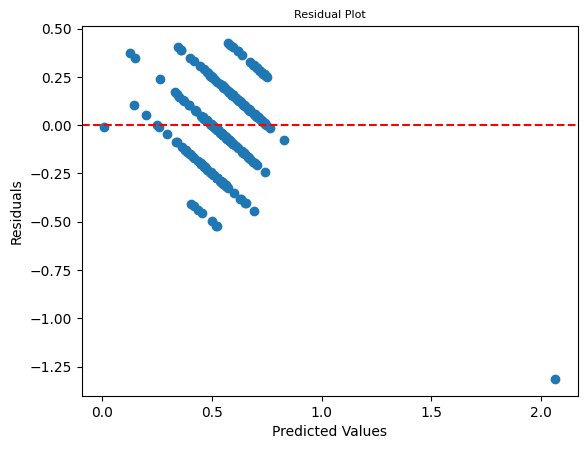

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

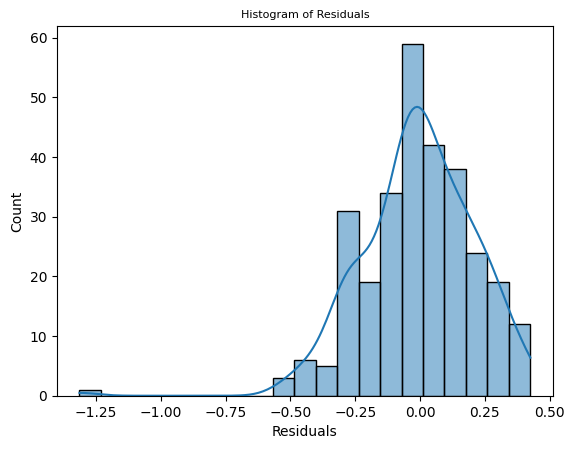

In [ ]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

In [ ]:
import numpy as np

correlation = np.corrcoef(predictive_df2['Net Income'], predictive_df2['Summary star rating'])[0, 1]
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: -0.016415377862254135


In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", stat)
print("P-Value:", p)

if p > 0.05:
    print("Residuals appear to follow a normal distribution.")
else:
    print("Residuals do not follow a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9578775778349248
P-Value: 1.7347759178735938e-07
Residuals do not follow a normal distribution.


In [ ]:
from scipy.stats import zscore

# Compute z-scores of residuals
z_scores = zscore(residuals)

# Identify outliers (e.g., |z| > 3)
outliers = residuals[np.abs(z_scores) > 3]
print("Outliers:", outliers)

Outliers: 738   -1.313402
Name: Summary star rating, dtype: float64


#Baseline Model

In [ ]:
X = predictive_df2.drop(columns=['Care transition - star rating', 'Cleanliness - star rating',
       'Communication about medicines - star rating',
       'Discharge information - star rating',
       'Doctor communication - star rating',
       'Nurse communication - star rating',
       'Overall hospital rating - star rating', 'Quietness - star rating',
       'Recommend hospital - star rating',
       'Staff responsiveness - star rating', 'Summary star rating'])  # Exclude target
y = predictive_df2['Summary star rating']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Evaluate
predictions = tree.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06527303754266212


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


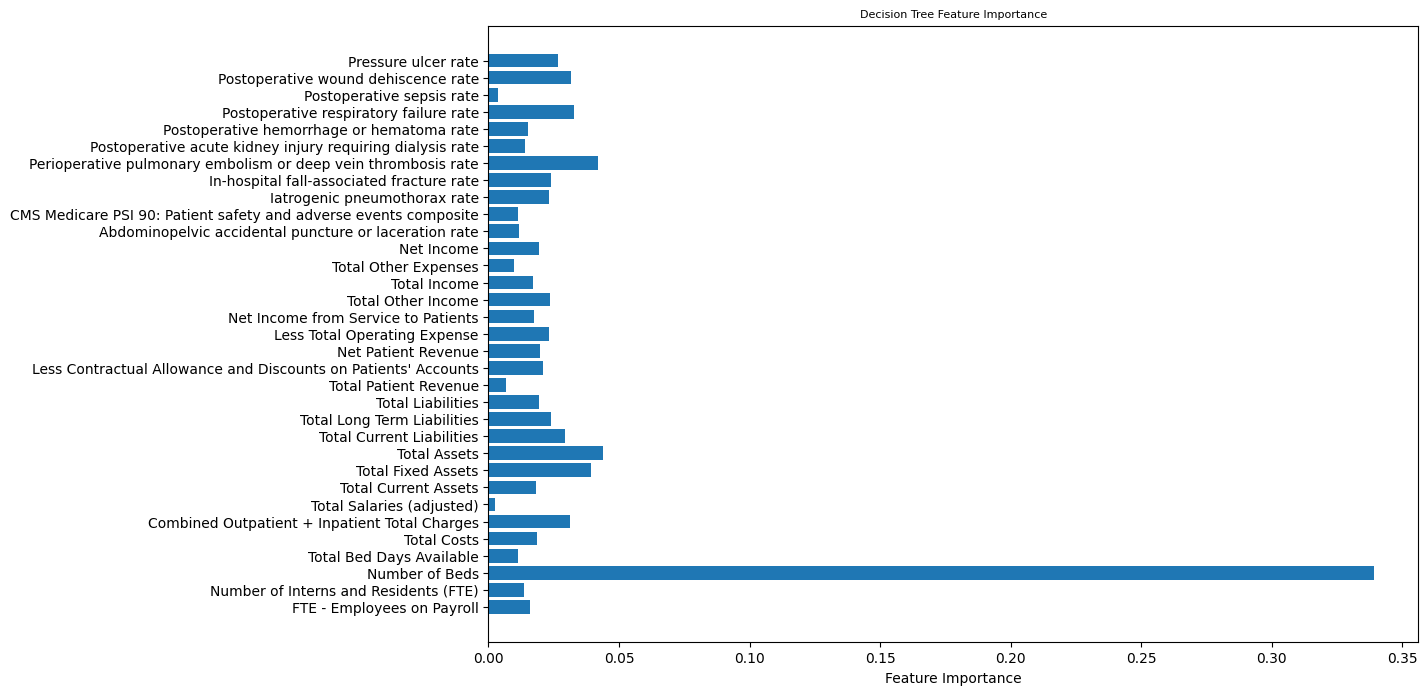

In [ ]:
plt.figure(figsize=(12, 8))
importances = tree.feature_importances_

# Get the list of feature names from the index
feature_names = X.columns.tolist()
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

#2nd Model - Fine-tuned parameters

In [ ]:
# Define the model with the best parameters
final_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model on the training data
final_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test dataset
y_pred = final_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) on Test Data:", mse)
print("R² Score on Test Data:", r2)


Mean Squared Error (MSE) on Test Data: 0.04364375942914461
R² Score on Test Data: 0.23574235528146137


#Create New DFs with Rural and Urban

In [ ]:
# Drop rows with null values in 'summary star rating' column
predictive_null_df = predictive_df.dropna(subset=['Summary star rating'])

# Check the number of rows and columns in the new DataFrame
rows_null_df, columns_null_df = predictive_null_df.shape

print(f"Number of rows after dropping nulls in 'summary star rating': {rows_null_df}")
print(f"Number of columns: {columns_null_df}")

Number of rows after dropping nulls in 'summary star rating': 1463
Number of columns: 53


In [ ]:
# Get the number of rows and columns of the original DataFrame
rows, columns = predictive_null_df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1463
Number of columns: 53


In [ ]:
# Get the number of rows and columns of the original DataFrame
rows, columns = predictive_null_df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1463
Number of columns: 53


In [ ]:
# Create a copy of the DataFrame
predictive_df = predictive_null_df.copy()

# Impute numeric columns with their mode in the copied DataFrame
for col in predictive_df2.select_dtypes(include=['number']):
    predictive_df2[col] = predictive_df2[col].fillna(predictive_df2[col].mode()[0])

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
predictive_df[numeric_cols] = scaler.fit_transform(predictive_df[numeric_cols])


# Preview the data after scaling
predictive_df.head()

,Facility Name,Rural Versus Urban,CCN Facility Type,FTE - Employees on Payroll,Number of Interns and Residents (FTE),Number of Beds,Total Bed Days Available,Total Costs,Combined Outpatient + Inpatient Total Charges,Total Salaries (adjusted),...,Quietness - star rating,Recommend hospital - star rating,Staff responsiveness - star rating,Summary star rating,Facility ID,Address,City/Town,State,ZIP Code,County/Parish
2,UVA HEALTH HAYMARKET MEDICAL CENTER,U,STH,0.007541,NaN,0.013187,0.006083,0.005167,0.004450,0.003922,...,0.75,0.75,0.50,0.75,490144.0,15225 HEALTHCOTE BOULEVARD,HAYMARKET,VA,20169,PRINCE WILLIAM
3,PIEDMONT CARTERSVILLE MEDICAL CENTER,U,STH,0.023239,0.001753,0.040659,0.030668,0.016030,0.028224,0.010959,...,0.50,0.25,0.25,0.25,110030.0,960 JOE FRANK HARRIS PARKWAY,CARTERSVILLE,GA,30120,BARTOW
4,HUNTINGTON HOSPITAL,R,STH,0.107408,0.030601,0.168498,0.082600,0.052429,0.048120,0.051431,...,0.25,0.75,0.50,0.50,50438.0,100 W CALIFORNIA BLVD,PASADENA,CA,91109,LOS ANGELES
5,ATRIUM MEDICAL CENTER,U,LTCH,0.002883,NaN,0.003663,0.004686,0.007180,0.004128,NaN,...,0.75,0.50,0.25,0.50,360076.0,ONE MEDICAL CENTER DRIVE,FRANKLIN,OH,45005,WARREN
7,LONG ISLAND COMMUNITY HOSPITAL,U,STH,0.046322,0.022280,0.057509,0.038296,0.024921,0.024913,0.022460,...,0.00,0.00,0.00,0.00,330141.0,101 HOSPITAL ROAD,PATCHOGUE,NY,11772,SUFFOLK


In [ ]:
# Create two new dataframes based on 'Rural Versus Urban' column
rural_df = predictive_df[predictive_df['Rural Versus Urban'] == 'R']
urban_df = predictive_df[predictive_df['Rural Versus Urban'] == 'U']

print("Rural DataFrame:")
rural_df.head()

Rural DataFrame:


,Facility Name,Rural Versus Urban,CCN Facility Type,FTE - Employees on Payroll,Number of Interns and Residents (FTE),Number of Beds,Total Bed Days Available,Total Costs,Combined Outpatient + Inpatient Total Charges,Total Salaries (adjusted),...,Quietness - star rating,Recommend hospital - star rating,Staff responsiveness - star rating,Summary star rating,Facility ID,Address,City/Town,State,ZIP Code,County/Parish
4,HUNTINGTON HOSPITAL,R,STH,0.107408,0.030601,0.168498,0.082600,0.052429,0.048120,0.051431,...,0.25,0.75,0.50,0.50,50438.0,100 W CALIFORNIA BLVD,PASADENA,CA,91109,LOS ANGELES
8,MONADNOCK COMMUNITY HOSPITAL,R,CAH,0.015624,NaN,0.006227,0.007247,0.011045,0.003435,NaN,...,0.50,0.50,0.75,0.75,301309.0,452 OLD STREET ROAD,PETERBOROUGH,NH,3458,HILLSBOROUGH
9,MARIETTA MEMORIAL HOSPITAL,R,STH,0.089334,0.024368,0.065934,0.066893,0.065039,0.034912,0.075211,...,0.25,0.50,0.75,0.50,360147.0,401 MATTHEW STREET,MARIETTA,OH,45750,WASHINGTON
11,CARILION STONEWALL JACKSON HOSPITAL,R,CAH,0.006950,NaN,0.006227,0.007247,0.007181,0.004593,NaN,...,0.50,0.50,0.75,0.75,491304.0,1 HEALTH CIRCLE,LEXINGTON,VA,24450,LEXINGTON CITY
19,J ARTHUR DOSHER MEMORIAL HOSPITAL,R,CAH,0.010559,NaN,0.006227,0.007247,0.006442,0.003442,NaN,...,0.75,1.00,1.00,1.00,341327.0,924 HOWE ST,SOUTHPORT,NC,28461,BRUNSWICK


#Decision Tree - Rural Hospitals

In [ ]:
# Select features (exclude target and non-numeric columns)
features = rural_df.select_dtypes(include=['float64', 'int64']).drop('Summary star rating', axis=1)
target = rural_df['Summary star rating']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Evaluate
predictions = tree.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.014142335766423358


#Decision Tree - Urban Hospitals

In [ ]:
# Select features (exclude target and non-numeric columns)
features = urban_df.select_dtypes(include=['float64', 'int64']).drop('Summary star rating', axis=1)
target = urban_df['Summary star rating']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Evaluate
predictions = tree.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.011618589743589744
